In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

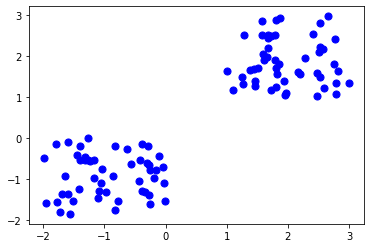

In [3]:
x=-2*np.random.rand(100,2)
y=1+2*np.random.rand(50,2)
x[50:100,:]=y
plt.scatter(x[:,0],x[:,1],s=50,c='b')

In [4]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
print("centroids:",centroids)
print("labels:",labels)

centroids: [[-0.94239568 -0.89673103]
 [ 1.97608129  1.85666698]]
labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


coordinate: [-1.69353266 -1.36705442] label: 0
coordinate: [-0.41171147 -0.52174506] label: 0
coordinate: [-0.82275093 -0.20113039] label: 0
coordinate: [-1.16965041 -0.96614979] label: 0
coordinate: [-0.25887996 -1.59498621] label: 0
coordinate: [-1.51460126 -1.53103667] label: 0
coordinate: [-0.8592149  -0.92162111] label: 0
coordinate: [-1.17280406 -0.52833843] label: 0
coordinate: [-0.26527903 -0.64821951] label: 0
coordinate: [-1.6500044  -0.92951834] label: 0
coordinate: [-1.95204806 -1.57483143] label: 0
coordinate: [-1.04286398 -0.75831312] label: 0
coordinate: [-0.43631765 -1.04867839] label: 0
coordinate: [-0.82828449 -1.76057293] label: 0
coordinate: [-1.10388667 -1.46408411] label: 0
coordinate: [-1.26566302 -0.52068815] label: 0
coordinate: [-1.44279686 -0.40862653] label: 0
coordinate: [-0.34306811 -1.31054534] label: 0
coordinate: [-1.08821431 -1.28529803] label: 0
coordinate: [-1.77959738 -1.55146193] label: 0
coordinate: [-0.2654692  -1.37733287] label: 0
coordinate: [

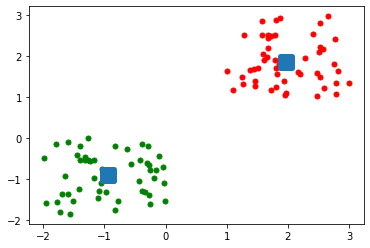

In [5]:
colors=["g.","r.","c.","y."]

for i in range(len(x)):
    print("coordinate:",x[i],"label:",labels[i])
    plt.plot(x[i][0],x[i][1], colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker="s",s=150,linewidths=5,zorder=10)
plt.show()

In [6]:
data=pd.read_csv('/home/deblens/scrubbedfifa.csv',encoding = "ISO-8859-1")
data.head()

,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,84,95,70,90,86,97,93,94,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,92,79,87,62,84,84,96,88,87,...,81,94,27,24,33,9,9,15,15,11
3,De Gea,91,17,13,21,50,13,18,21,19,...,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,91,93,82,55,92,82,86,85,83,...,79,88,68,58,51,15,13,5,10,13


In [7]:
df=pd.DataFrame(data,columns=['Overall','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle'])

In [8]:
kmeans=KMeans(n_clusters=2)
y=kmeans.fit_predict(df)
df['Cluster']=y
centroids=kmeans.cluster_centers_
print("centroids:",centroids)
print(df.head())

centroids: [[78.13898117 65.80564784 60.94850498 65.67774086 74.93521595 59.21151717
  72.58637874 64.77297896 58.24031008 68.39922481 75.78571429 71.38981174
  71.58859358 71.43133998 75.45902547 68.90420819 72.21760797 69.90919158
  74.66722038 70.81561462 64.81561462 69.7751938  60.46788483 66.49557032
  68.16500554 61.21317829 74.34717608 60.21871539 60.46566999 56.97065338]
 [78.7371134  14.95360825 13.17010309 14.67525773 31.97938144 13.91237113
  15.40721649 15.81958763 15.13402062 31.3556701  22.62886598 46.2628866
  46.91752577 48.88659794 74.44845361 44.78350515 24.5        67.27835052
  35.25773196 67.59278351 14.21649485 30.44845361 20.53092784 12.7371134
  48.39690722 22.11340206 57.68041237 17.11340206 14.32474227 14.06185567]]
   Overall  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0       94        84         95               70            90       86   
1       94        84         94               89            81       87   
2       92        79   

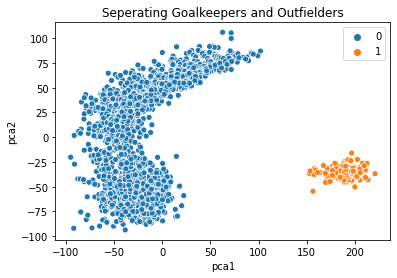

In [9]:
pca=PCA(n_components=2)
principalcomps=pca.fit_transform(df)
results=pd.DataFrame(principalcomps,columns=['pca1','pca2'])
sns.scatterplot(x="pca1",y="pca2",hue=y,data=results)
plt.title('Seperating Goalkeepers and Outfielders')
plt.annotate
plt.show()

In [10]:
df.to_csv('finished.csv', header = True , index = True)

In [11]:
data2=pd.read_csv('/home/deblens/predata.csv',encoding = "ISO-8859-1")
data2.head()

,Index,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,0,94,84,95,70,90,86,97,93,94,...,94,48,22,94,94,75,96,33,28,26
1,1,94,84,94,89,81,87,88,81,76,...,93,63,29,95,82,85,95,28,31,23
2,2,92,79,87,62,84,84,96,88,87,...,82,56,36,89,87,81,94,27,24,33
3,4,91,93,82,55,92,82,86,85,83,...,91,76,61,87,94,79,88,68,58,51
4,5,91,81,84,61,89,80,95,83,79,...,80,54,41,87,89,86,91,34,27,22


In [12]:
df2=pd.DataFrame(data2,columns=['Overall','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle'])

For K = 2, silhouette score is 0.33468951206463765)
For K = 3, silhouette score is 0.3051232733915003)
For K = 4, silhouette score is 0.25182602924506015)
For K = 5, silhouette score is 0.18794311670518757)
For K = 6, silhouette score is 0.1731278898265838)
For K = 7, silhouette score is 0.15534273692064382)
For K = 8, silhouette score is 0.1342202168492889)
For K = 9, silhouette score is 0.12207728831612125)
For K = 10, silhouette score is 0.1211320434198781)
For K = 11, silhouette score is 0.10915825507195016)
For K = 12, silhouette score is 0.1054634611991372)
For K = 13, silhouette score is 0.10264333802604715)
For K = 14, silhouette score is 0.1021315178737668)


<function matplotlib.pyplot.show(*args, **kw)>

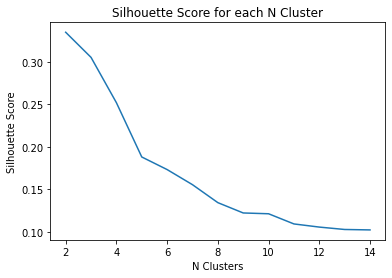

In [13]:
range_n_clusters=list(range(2,15))
total=[]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters).fit(df2)
    preds=clusterer.predict(df2)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df2, preds, metric='euclidean')
    total.append(score)
    print ("For K = {}, silhouette score is {})".format(n_clusters, score))
plt.plot(range_n_clusters,total)
plt.xlabel('N Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each N Cluster')
plt.show

In [14]:
kmeans=KMeans(n_clusters=2)
y=kmeans.fit_predict(df2)
df2['Cluster']=y
centroids=kmeans.cluster_centers_
print("centroids:",centroids)
print(df2.head())

centroids: [[77.89929507 62.61329305 49.8509567  68.90533736 74.65055388 49.49043303
  67.23967774 58.40986908 52.31722054 70.27492447 72.7693857  66.91339376
  68.17824773 66.10070493 75.09969789 64.81570997 68.29909366 72.08660624
  76.20140987 74.73716012 57.9284995  76.85800604 76.39375629 57.95669688
  63.59617321 54.11983887 73.42799597 74.62940584 77.43303122 75.06847936]
 [78.43173432 69.70479705 74.50307503 61.73554736 75.28290283 71.08487085
  79.11685117 72.54489545 65.47478475 66.10824108 79.4698647  76.85731857
  75.75399754 77.94218942 75.89790898 73.89790898 77.00369004 67.2496925
  72.79335793 66.02583026 73.22755228 61.12423124 41.01599016 76.92496925
  73.74538745 69.87699877 75.4698647  42.61746617 39.74169742 34.86592866]]
   Overall  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0       94        84         95               70            90       86   
1       94        84         94               89            81       87   
2       92        79  

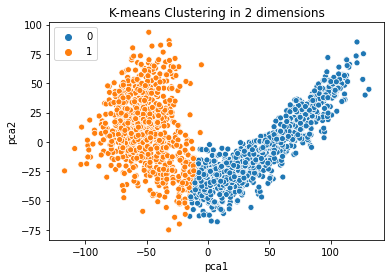

In [15]:
pca=PCA(n_components=2)
principalcomps=pca.fit_transform(df2)
results=pd.DataFrame(principalcomps,columns=['pca1','pca2'])
sns.scatterplot(x="pca1",y="pca2",hue=y,data=results)
plt.title('K-means Clustering in 2 dimensions')
plt.annotate
plt.show()

In [16]:
print(df2.head())

   Overall  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0       94        84         95               70            90       86   
1       94        84         94               89            81       87   
2       92        79         87               62            84       84   
3       91        93         82               55            92       82   
4       91        81         84               61            89       80   

   Dribbling  Curve  FKAccuracy  LongPassing  ...  Aggression  Interceptions  \
0         97     93          94           87  ...          48             22   
1         88     81          76           77  ...          63             29   
2         96     88          87           78  ...          56             36   
3         86     85          83           91  ...          76             61   
4         95     83          79           83  ...          54             41   

   Positioning  Vision  Penalties  Composure  Marking  StandingTackl

In [17]:
df2.to_csv('nongoaliesdone.csv', header = True , index = True)